# Cluster Identification and Local/Neighborhood Structure Preservation 
We need to identify cell type clusters in each dataset and analyze their dynamics across multiple DRs.

In [2]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

Using TensorFlow backend.


FIt-SNE repository not detected. Functionality will be disabled.


/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/kopt/config.py:60: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  _config = yaml.load(open(_config_path))


---
To benchmark dimensionality reduction techniques, we are using two datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be highly __discrete__, containing highly separable cell populations, where the latter should be __continuous__, representing a continuum of branching cell states in the gut epithelium.

---
### Retina
Read in t-SNE projection and clustering performed using Seurat's graph-based method

In [12]:
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.allgenes.tsv')

In [89]:
retina_clu = DR.from_file('Rmethods_out/retina_seurat_tSNE.csv', labels=[0,0], barcodefile='../inputs/retina_clu_seurat.csv', name='t-SNE')

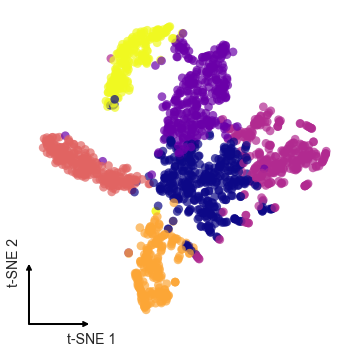

In [90]:
retina_clu.plot_barcodes()

In [92]:
retina_clu.plot_barcodes(save_to='../images/retina_clu_barcodes.png', figsize=(6,6))

In [93]:
retina_clu.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Opn1mw$')].flatten(), save_to='../images/retina_clu_Opn1mw.png', figsize=(6,6))

In [94]:
retina_clu.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rlbp1$')].flatten(), save_to='../images/retina_clu_Rlbp1.png', figsize=(6,6))

In [95]:
retina_clu.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Vsx2$')].flatten(), save_to='../images/retina_clu_Vsx2.png', figsize=(6,6))

In [96]:
retina_clu.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Pax6$')].flatten(), save_to='../images/retina_clu_Pax6.png', figsize=(6,6))

In [102]:
retina_clu.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Scgn$')].flatten(), save_to='../images/retina_clu_Scgn.png', figsize=(6,6))

In [99]:
retina_clu.plot(color=retina.arcsinh_norm().sum(axis=1), save_to='../images/retina_clu_UMI.png', figsize=(6,6))

---
### Colon
Read in t-SNE projection and clustering performed using Seurat's graph-based method

In [65]:
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq_filtered.tsv.gz')

In [105]:
colon_clu = DR.from_file('Rmethods_out/colon_seurat_tSNE.csv', labels=[0,0], barcodefile='../inputs/colon_clu_seurat.csv', name='t-SNE')

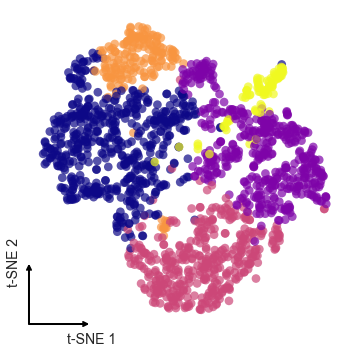

In [106]:
colon_clu.plot_barcodes()

In [107]:
colon_clu.plot_barcodes(save_to='../images/colon_clu_barcodes.png', figsize=(6,6))

In [108]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc2'].flatten(), save_to='../images/colon_clu_Muc2.png', figsize=(6,6))

In [109]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Krt20'].flatten(), save_to='../images/colon_clu_Krt20.png', figsize=(6,6))

In [110]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Reg4'].flatten(), save_to='../images/colon_clu_Reg4.png', figsize=(6,6))

In [111]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Cd8a'].flatten(), save_to='../images/colon_clu_Cd8a.png', figsize=(6,6))

In [112]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Clca1'].flatten(), save_to='../images/colon_clu_Clca1.png', figsize=(6,6))

In [130]:
colon_clu.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc3'].flatten(), save_to='../images/colon_clu_Muc3.png', figsize=(6,6))

In [114]:
colon_clu.plot(color=colon.arcsinh_norm().sum(axis=1), save_to='../images/colon_clu_UMI.png', figsize=(6,6))